In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load data from csv 
trial1_results = pd.read_csv('SVR_WithTime_Offset_5_Trial_1.csv', header=0)
trial2_results = pd.read_csv('SVR_WithTime_Offset_5_Trial_2.csv', header=0)
trial3_results = pd.read_csv('SVR_WithTime_Offset_5_Trial_3.csv', header=0)

In [3]:
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,1.0,8.8896,1900.0
3,4.0,1.0,8.1373,2800.0
4,5.0,2.0,6.0855,3600.0
...,...,...,...,...
3001,3002.0,3.0,6.5156,345800.0
3002,3003.0,8.0,6.5156,342800.0
3003,3004.0,8.0,6.5156,339800.0
3004,3005.0,8.0,6.5156,336800.0


In [4]:
trial2_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,1.0,9.7381,900.0
2,3.0,2.0,8.4907,1700.0
3,4.0,2.0,8.7030,2500.0
4,5.0,3.0,4.5642,3000.0
...,...,...,...,...
3001,3002.0,6.0,5.4857,526000.0
3002,3003.0,6.0,5.4857,525500.0
3003,3004.0,6.0,5.4857,525000.0
3004,3005.0,6.0,5.4857,524500.0


In [5]:
trial3_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,1.0,9.7381,900.0
2,3.0,2.0,8.4907,1700.0
3,4.0,3.0,6.2335,2200.0
4,5.0,3.0,6.2593,2700.0
...,...,...,...,...
3001,3002.0,2.0,8.4872,287300.0
3002,3003.0,2.0,7.4015,288100.0
3003,3004.0,2.0,6.4631,288900.0
3004,3005.0,2.0,6.4059,289700.0


## Analyse per timestep rewards

In [6]:
timeStop = 3000

In [7]:
trial1_rewards = trial1_results['Cummulative Reward'].tolist()
trial1_rewards = trial1_rewards[:timeStop]

In [8]:
trial2_rewards = trial2_results['Cummulative Reward'].tolist()
trial2_rewards = trial2_rewards[:timeStop]

In [9]:
trial3_rewards = trial3_results['Cummulative Reward'].tolist()
trial3_rewards = trial3_rewards[:timeStop]

In [10]:
data = {'Trial 1': trial1_rewards, 'Trial 2': trial2_rewards, 'Trial 3': trial3_rewards}
rewards_DF = pd.DataFrame(data=data)
rewards_DF

,Trial 1,Trial 2,Trial 3
0,0.0,0.0,0.0
1,1000.0,900.0,900.0
2,1900.0,1700.0,1700.0
3,2800.0,2500.0,2200.0
4,3600.0,3000.0,2700.0
...,...,...,...
2995,343200.0,521800.0,284400.0
2996,342700.0,522800.0,284900.0
2997,343500.0,523800.0,285400.0
2998,344300.0,524800.0,284900.0


In [11]:
rewards_DF['mean'] = rewards_DF.mean(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean
0,0.0,0.0,0.0,0.000000
1,1000.0,900.0,900.0,933.333333
2,1900.0,1700.0,1700.0,1766.666667
3,2800.0,2500.0,2200.0,2500.000000
4,3600.0,3000.0,2700.0,3100.000000
...,...,...,...,...
2995,343200.0,521800.0,284400.0,383133.333333
2996,342700.0,522800.0,284900.0,383466.666667
2997,343500.0,523800.0,285400.0,384233.333333
2998,344300.0,524800.0,284900.0,384666.666667


In [12]:
rewards_DF['Standard Deviation'] = rewards_DF[['Trial 1','Trial 2', 'Trial 3']].std(axis=1)
rewards_DF

,Trial 1,Trial 2,Trial 3,mean,Standard Deviation
0,0.0,0.0,0.0,0.000000,0.000000
1,1000.0,900.0,900.0,933.333333,57.735027
2,1900.0,1700.0,1700.0,1766.666667,115.470054
3,2800.0,2500.0,2200.0,2500.000000,300.000000
4,3600.0,3000.0,2700.0,3100.000000,458.257569
...,...,...,...,...,...
2995,343200.0,521800.0,284400.0,383133.333333,123635.323971
2996,342700.0,522800.0,284900.0,383466.666667,124078.778739
2997,343500.0,523800.0,285400.0,384233.333333,124310.270426
2998,344300.0,524800.0,284900.0,384666.666667,124940.399124


In [13]:
rewards_upper = []
rewards_lower = []
for index, row in rewards_DF.iterrows():
    meanReward = row['mean']
    stdev = row['Standard Deviation']
    maxReward = meanReward + stdev
    rewards_upper.append(maxReward)
    minReward = meanReward - stdev
    rewards_lower.append(minReward)

In [14]:
rewards_mean = rewards_DF['mean'].tolist()
rewards_mean

[0.0,
 933.3333333333334,
 1766.6666666666667,
 2500.0,
 3100.0,
 2200.0,
 1300.0,
 400.0,
 -133.33333333333334,
 666.6666666666666,
 300.0,
 -100.0,
 -533.3333333333334,
 -1066.6666666666667,
 -1933.3333333333333,
 -2400.0,
 -2966.6666666666665,
 -3533.3333333333335,
 -4433.333333333333,
 -5333.333333333333,
 -6333.333333333333,
 -7333.333333333333,
 -8166.666666666667,
 -8566.666666666666,
 -7633.333333333333,
 -6833.333333333333,
 -6400.0,
 -5533.333333333333,
 -4700.0,
 -3966.6666666666665,
 -4433.333333333333,
 -5766.666666666667,
 -4833.333333333333,
 -3933.3333333333335,
 -3700.0,
 -4100.0,
 -4600.0,
 -6266.666666666667,
 -7933.333333333333,
 -9600.0,
 -11266.666666666666,
 -12933.333333333334,
 -14600.0,
 -16266.666666666666,
 -17933.333333333332,
 -18266.666666666668,
 -18600.0,
 -18933.333333333332,
 -19266.666666666668,
 -18933.333333333332,
 -18633.333333333332,
 -18333.333333333332,
 -18033.333333333332,
 -18266.666666666668,
 -18500.0,
 -18733.333333333332,
 -19066.666666

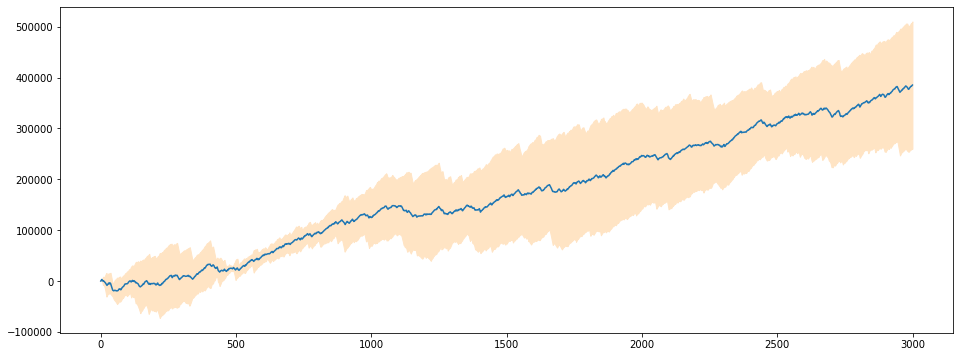

In [15]:
#plot graph 
x = [i for i in range(timeStop)]
plt.figure(figsize=(16, 6))
plt.plot(x, rewards_mean)
plt.fill_between(x, rewards_upper, rewards_lower, color='bisque')
plt.show()

## Analyse number of failure and maintenance instances

In [16]:
trial1_states = trial1_results['State'].tolist()
trial1_states = trial1_states[:3000]
trial1_states

[0.0,
 0.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 3.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 3.0,
 3.0,
 8.0,
 8.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 6.0,
 1.0,
 2.0,
 2.0,
 2.0,
 3.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 4.0,
 4.0,
 4.0,
 0.0,
 1.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 7.0,
 2.0,
 2.0,
 3.0,
 3.0,
 8.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 4.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 1.0,
 1.0,
 2.0,
 2.0,
 6.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 5.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 5.0,
 5.0,
 5.0,
 5.0,
 0.0,
 1.0,
 1.0,
 2.0,
 6.0,
 6.0,
 6.0,
 6.0,
 1.0,
 2.0,
 3.0,
 3.0,
 7.0,
 2.0,
 3.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 5.0,
 0.0,
 0.0

In [17]:
def findNumEpisodes(stateList):
    previousState = stateList[0]
    currentState = stateList[0]
    endIndexes = []
    for order in range(len(stateList)):
        currentState = stateList[order]
        
        #check for failure
        if (currentState == 0) and (previousState > 7):
            endIndexes.append(order - 1)
            
        previousState = stateList[order]
    return len(endIndexes)

In [18]:
trial1_numEpisodes = findNumEpisodes(trial1_states)
trial1_numEpisodes

98

In [19]:
def findIndexesOfState(state, dataDF):
    stateIndexes = []
    for index, row in dataDF.iterrows():
        currentState = row['State']
        if currentState == state:
            timestep = row['Timestep']
            stateIndexes.append(timestep)
    return stateIndexes

In [20]:
trial1_results = trial1_results[:3000]
trial1_results

,Timestep,State,Current RUL,Cummulative Reward
0,1.0,0.0,10.8321,0.0
1,2.0,0.0,9.6658,1000.0
2,3.0,1.0,8.8896,1900.0
3,4.0,1.0,8.1373,2800.0
4,5.0,2.0,6.0855,3600.0
...,...,...,...,...
2995,2996.0,7.0,3.1353,343200.0
2996,2997.0,7.0,3.1353,342700.0
2997,2998.0,2.0,10.8403,343500.0
2998,2999.0,2.0,9.5413,344300.0


In [21]:
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_indexes

[23.0,
 24.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 74.0,
 75.0,
 159.0,
 181.0,
 182.0,
 183.0,
 184.0,
 264.0,
 265.0,
 284.0,
 285.0,
 286.0,
 287.0,
 288.0,
 289.0,
 290.0,
 291.0,
 292.0,
 331.0,
 332.0,
 333.0,
 334.0,
 335.0,
 336.0,
 337.0,
 338.0,
 339.0,
 340.0,
 406.0,
 407.0,
 408.0,
 409.0,
 410.0,
 411.0,
 417.0,
 418.0,
 419.0,
 420.0,
 421.0,
 422.0,
 423.0,
 424.0,
 425.0,
 426.0,
 459.0,
 460.0,
 461.0,
 462.0,
 463.0,
 464.0,
 465.0,
 470.0,
 476.0,
 507.0,
 508.0,
 509.0,
 510.0,
 511.0,
 512.0,
 532.0,
 551.0,
 585.0,
 586.0,
 602.0,
 603.0,
 609.0,
 635.0,
 636.0,
 637.0,
 666.0,
 667.0,
 668.0,
 733.0,
 734.0,
 735.0,
 736.0,
 737.0,
 738.0,
 775.0,
 776.0,
 777.0,
 778.0,
 779.0,
 780.0,
 781.0,
 904.0,
 932.0,
 933.0,
 934.0,
 935.0,
 936.0,
 997.0,
 998.0,
 999.0,
 1000.0,
 1056.0,
 1057.0,
 1058.0,
 1059.0,
 1060.0,
 1061.0,
 1062.0,
 1090.0,
 1091.0,
 1092.0,
 1093.0,
 1094.0,
 1095.0,
 1113.0,
 1114.0,
 1115.0,
 1116.0,
 1117.0,
 1118.0,


In [22]:
def findNumInstancesInState(stateIndexes):
    previousIndex = stateIndexes[0]
    stateCount = 0
    for i in stateIndexes:
        if i - previousIndex > 1:
            stateCount += 1
        previousIndex = i
    return stateCount

In [23]:
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
trial1_state8_instanceCount

69

In [24]:
#state 8

#trial1
trial1_results = trial1_results[:3000]
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_instanceCount = findNumInstancesInState(trial1_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial1_state8_instanceCount)

#trial2
trial2_results = trial2_results[:3000]
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_instanceCount = findNumInstancesInState(trial2_state8_indexes)
print("Number of instances in trial2 in state 8: %d" % trial2_state8_instanceCount)

#trial3
trial3_results = trial3_results[:3000]
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_instanceCount = findNumInstancesInState(trial3_state8_indexes)
print("Number of instances in trial1 in state 8: %d" % trial3_state8_instanceCount)

average_state8_instanceCount = (trial1_state8_instanceCount + trial2_state8_instanceCount + trial3_state8_instanceCount)/3
print(f"Average number of instances in state 8: {average_state8_instanceCount}")

Number of instances in trial1 in state 8: 69
Number of instances in trial2 in state 8: 64
Number of instances in trial1 in state 8: 60
Average number of instances in state 8: 64.33333333333333


In [25]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_instanceCount = findNumInstancesInState(trial1_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial1_state9_instanceCount)

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_instanceCount = findNumInstancesInState(trial2_state9_indexes)
print("Number of instances in trial2 in state 9: %d" % trial2_state9_instanceCount)

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_instanceCount = findNumInstancesInState(trial3_state9_indexes)
print("Number of instances in trial1 in state 9: %d" % trial3_state9_instanceCount)

average_state9_instanceCount = (trial1_state9_instanceCount + trial2_state9_instanceCount + trial3_state9_instanceCount)/3
print(f"Average number of instances in state 9: {average_state9_instanceCount}")

Number of instances in trial1 in state 9: 27
Number of instances in trial2 in state 9: 27
Number of instances in trial1 in state 9: 37
Average number of instances in state 9: 30.333333333333332


## Analyse percentage of time in each state

In [26]:
#state 0

#trial1
trial1_state0_indexes = findIndexesOfState(0, trial1_results)
trial1_state0_count = len(trial1_state0_indexes)
trial1_state0_percentage = trial1_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (0, trial1_state0_count, trial1_state0_percentage))

#trial2
trial2_state0_indexes = findIndexesOfState(0, trial2_results)
trial2_state0_count = len(trial2_state0_indexes)
trial2_state0_percentage = trial2_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (0, trial2_state0_count, trial2_state0_percentage))

#trial3
trial3_state0_indexes = findIndexesOfState(0, trial3_results)
trial3_state0_count = len(trial3_state0_indexes)
trial3_state0_percentage = trial3_state0_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (0, trial3_state0_count, trial3_state0_percentage))

#average 
average_state0_count = (trial1_state0_count + trial2_state0_count + trial3_state0_count)/3
average_state0_percentage = average_state0_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (0, average_state0_count, average_state0_percentage))

Machine is in state 0 for 462 timesteps 0.1540 percentage of time in trial 1
Machine is in state 0 for 437 timesteps 0.1457 percentage of time in trial 2
Machine is in state 0 for 458 timesteps 0.1527 percentage of time in trial 3
Machine is in state 0 for 452.3333 timesteps 0.1508 percentage of time on average


In [27]:
#state 1

#trial1
trial1_state1_indexes = findIndexesOfState(1, trial1_results)
trial1_state1_count = len(trial1_state1_indexes)
trial1_state1_percentage = trial1_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (1, trial1_state1_count, trial1_state1_percentage))

#trial2
trial2_state1_indexes = findIndexesOfState(1, trial2_results)
trial2_state1_count = len(trial2_state1_indexes)
trial2_state1_percentage = trial2_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (1, trial2_state1_count, trial2_state1_percentage))

#trial3
trial3_state1_indexes = findIndexesOfState(1, trial3_results)
trial3_state1_count = len(trial3_state1_indexes)
trial3_state1_percentage = trial3_state1_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (1, trial3_state1_count, trial3_state1_percentage))

#average 
average_state1_count = (trial1_state1_count + trial2_state1_count + trial3_state1_count)/3
average_state1_percentage = average_state1_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (1, average_state1_count, average_state1_percentage))

Machine is in state 1 for 503 timesteps 0.1677 percentage of time in trial 1
Machine is in state 1 for 547 timesteps 0.1823 percentage of time in trial 2
Machine is in state 1 for 503 timesteps 0.1677 percentage of time in trial 3
Machine is in state 1 for 517.6667 timesteps 0.1726 percentage of time on average


In [28]:
#state 2

#trial1
trial1_state2_indexes = findIndexesOfState(2, trial1_results)
trial1_state2_count = len(trial1_state2_indexes)
trial1_state2_percentage = trial1_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (2, trial1_state2_count, trial1_state2_percentage))

#trial2
trial2_state2_indexes = findIndexesOfState(2, trial2_results)
trial2_state2_count = len(trial2_state2_indexes)
trial2_state2_percentage = trial2_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (2, trial2_state2_count, trial2_state2_percentage))

#trial3
trial3_state2_indexes = findIndexesOfState(2, trial3_results)
trial3_state2_count = len(trial3_state2_indexes)
trial3_state2_percentage = trial3_state2_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (2, trial3_state2_count, trial3_state2_percentage))

#average 
average_state2_count = (trial1_state2_count + trial2_state2_count + trial3_state2_count)/3
average_state2_percentage = average_state2_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (2, average_state2_count, average_state2_percentage))

Machine is in state 2 for 697 timesteps 0.2323 percentage of time in trial 1
Machine is in state 2 for 718 timesteps 0.2393 percentage of time in trial 2
Machine is in state 2 for 655 timesteps 0.2183 percentage of time in trial 3
Machine is in state 2 for 690.0000 timesteps 0.2300 percentage of time on average


In [29]:
#state 3

#trial1
trial1_state3_indexes = findIndexesOfState(3, trial1_results)
trial1_state3_count = len(trial1_state3_indexes)
trial1_state3_percentage = trial1_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (3, trial1_state3_count, trial1_state3_percentage))

#trial2
trial2_state3_indexes = findIndexesOfState(3, trial2_results)
trial2_state3_count = len(trial2_state3_indexes)
trial2_state3_percentage = trial2_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (3, trial2_state3_count, trial2_state3_percentage))

#trial3
trial3_state3_indexes = findIndexesOfState(3, trial3_results)
trial3_state3_count = len(trial3_state3_indexes)
trial3_state3_percentage = trial3_state3_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (3, trial3_state3_count, trial3_state3_percentage))

#average 
average_state3_count = (trial1_state3_count + trial2_state3_count + trial3_state3_count)/3
average_state3_percentage = average_state3_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (3, average_state3_count, average_state3_percentage))

Machine is in state 3 for 338 timesteps 0.1127 percentage of time in trial 1
Machine is in state 3 for 337 timesteps 0.1123 percentage of time in trial 2
Machine is in state 3 for 310 timesteps 0.1033 percentage of time in trial 3
Machine is in state 3 for 328.3333 timesteps 0.1094 percentage of time on average


In [30]:
#state 4

#trial1
trial1_state4_indexes = findIndexesOfState(4, trial1_results)
trial1_state4_count = len(trial1_state4_indexes)
trial1_state4_percentage = trial1_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (4, trial1_state4_count, trial1_state4_percentage))

#trial2
trial2_state4_indexes = findIndexesOfState(4, trial2_results)
trial2_state4_count = len(trial2_state4_indexes)
trial2_state4_percentage = trial2_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (4, trial2_state4_count, trial2_state4_percentage))

#trial3
trial3_state4_indexes = findIndexesOfState(4, trial3_results)
trial3_state4_count = len(trial3_state4_indexes)
trial3_state4_percentage = trial3_state4_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (4, trial3_state4_count, trial3_state4_percentage))

#average 
average_state4_count = (trial1_state4_count + trial2_state4_count + trial3_state4_count)/3
average_state4_percentage = average_state4_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (4, average_state4_count, average_state4_percentage))

Machine is in state 4 for 37 timesteps 0.0123 percentage of time in trial 1
Machine is in state 4 for 28 timesteps 0.0093 percentage of time in trial 2
Machine is in state 4 for 38 timesteps 0.0127 percentage of time in trial 3
Machine is in state 4 for 34.3333 timesteps 0.0114 percentage of time on average


In [31]:
#state 5

#trial1
trial1_state5_indexes = findIndexesOfState(5, trial1_results)
trial1_state5_count = len(trial1_state5_indexes)
trial1_state5_percentage = trial1_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (5, trial1_state5_count, trial1_state5_percentage))

#trial2
trial2_state5_indexes = findIndexesOfState(5, trial2_results)
trial2_state5_count = len(trial2_state5_indexes)
trial2_state5_percentage = trial2_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (5, trial2_state5_count, trial2_state5_percentage))

#trial3
trial3_state5_indexes = findIndexesOfState(5, trial3_results)
trial3_state5_count = len(trial3_state5_indexes)
trial3_state5_percentage = trial3_state5_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (5, trial3_state5_count, trial3_state5_percentage))

#average 
average_state5_count = (trial1_state5_count + trial2_state5_count + trial3_state5_count)/3
average_state5_percentage = average_state5_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (5, average_state5_count, average_state5_percentage))

Machine is in state 5 for 85 timesteps 0.0283 percentage of time in trial 1
Machine is in state 5 for 85 timesteps 0.0283 percentage of time in trial 2
Machine is in state 5 for 85 timesteps 0.0283 percentage of time in trial 3
Machine is in state 5 for 85.0000 timesteps 0.0283 percentage of time on average


In [32]:
#state 6

#trial1
trial1_state6_indexes = findIndexesOfState(6, trial1_results)
trial1_state6_count = len(trial1_state6_indexes)
trial1_state6_percentage = trial1_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (6, trial1_state6_count, trial1_state6_percentage))

#trial2
trial2_state6_indexes = findIndexesOfState(6, trial2_results)
trial2_state6_count = len(trial2_state6_indexes)
trial2_state6_percentage = trial2_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (6, trial2_state6_count, trial2_state6_percentage))

#trial3
trial3_state6_indexes = findIndexesOfState(6, trial3_results)
trial3_state6_count = len(trial3_state6_indexes)
trial3_state6_percentage = trial3_state6_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (6, trial3_state6_count, trial3_state6_percentage))

#average 
average_state6_count = (trial1_state6_count + trial2_state6_count + trial3_state6_count)/3
average_state6_percentage = average_state6_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (6, average_state6_count, average_state6_percentage))

Machine is in state 6 for 172 timesteps 0.0573 percentage of time in trial 1
Machine is in state 6 for 163 timesteps 0.0543 percentage of time in trial 2
Machine is in state 6 for 165 timesteps 0.0550 percentage of time in trial 3
Machine is in state 6 for 166.6667 timesteps 0.0556 percentage of time on average


In [33]:
#state 7

#trial1
trial1_state7_indexes = findIndexesOfState(7, trial1_results)
trial1_state7_count = len(trial1_state7_indexes)
trial1_state7_percentage = trial1_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (7, trial1_state7_count, trial1_state7_percentage))

#trial2
trial2_state7_indexes = findIndexesOfState(7, trial2_results)
trial2_state7_count = len(trial2_state7_indexes)
trial2_state7_percentage = trial2_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (7, trial2_state7_count, trial2_state7_percentage))

#trial3
trial3_state7_indexes = findIndexesOfState(7, trial3_results)
trial3_state7_count = len(trial3_state7_indexes)
trial3_state7_percentage = trial3_state7_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (7, trial3_state7_count, trial3_state7_percentage))

#average 
average_state7_count = (trial1_state7_count + trial2_state7_count + trial3_state7_count)/3
average_state7_percentage = average_state7_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (7, average_state7_count, average_state7_percentage))

Machine is in state 7 for 227 timesteps 0.0757 percentage of time in trial 1
Machine is in state 7 for 251 timesteps 0.0837 percentage of time in trial 2
Machine is in state 7 for 242 timesteps 0.0807 percentage of time in trial 3
Machine is in state 7 for 240.0000 timesteps 0.0800 percentage of time on average


In [34]:
#state 8

#trial1
trial1_state8_indexes = findIndexesOfState(8, trial1_results)
trial1_state8_count = len(trial1_state8_indexes)
trial1_state8_percentage = trial1_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (8, trial1_state8_count, trial1_state8_percentage))

#trial2
trial2_state8_indexes = findIndexesOfState(8, trial2_results)
trial2_state8_count = len(trial2_state8_indexes)
trial2_state8_percentage = trial2_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (8, trial2_state8_count, trial2_state8_percentage))

#trial3
trial3_state8_indexes = findIndexesOfState(8, trial3_results)
trial3_state8_count = len(trial3_state8_indexes)
trial3_state8_percentage = trial3_state8_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (8, trial3_state8_count, trial3_state8_percentage))

#average 
average_state8_count = (trial1_state8_count + trial2_state8_count + trial3_state8_count)/3
average_state8_percentage = average_state8_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (8, average_state8_count, average_state8_percentage))

Machine is in state 8 for 278 timesteps 0.0927 percentage of time in trial 1
Machine is in state 8 for 224 timesteps 0.0747 percentage of time in trial 2
Machine is in state 8 for 247 timesteps 0.0823 percentage of time in trial 3
Machine is in state 8 for 249.6667 timesteps 0.0832 percentage of time on average


In [35]:
#state 9

#trial1
trial1_state9_indexes = findIndexesOfState(9, trial1_results)
trial1_state9_count = len(trial1_state9_indexes)
trial1_state9_percentage = trial1_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 1' % (9, trial1_state9_count, trial1_state9_percentage))

#trial2
trial2_state9_indexes = findIndexesOfState(9, trial2_results)
trial2_state9_count = len(trial2_state9_indexes)
trial2_state9_percentage = trial2_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 2' % (9, trial2_state9_count, trial2_state9_percentage))

#trial3
trial3_state9_indexes = findIndexesOfState(9, trial3_results)
trial3_state9_count = len(trial3_state9_indexes)
trial3_state9_percentage = trial3_state9_count/3000
print('Machine is in state %d for %d timesteps %.4f percentage of time in trial 3' % (9, trial3_state9_count, trial3_state9_percentage))

#average 
average_state9_count = (trial1_state9_count + trial2_state9_count + trial3_state9_count)/3
average_state9_percentage = average_state9_count/3000
print('Machine is in state %d for %.4f timesteps %.4f percentage of time on average' % (9, average_state9_count, average_state9_percentage))

Machine is in state 9 for 201 timesteps 0.0670 percentage of time in trial 1
Machine is in state 9 for 210 timesteps 0.0700 percentage of time in trial 2
Machine is in state 9 for 297 timesteps 0.0990 percentage of time in trial 3
Machine is in state 9 for 236.0000 timesteps 0.0787 percentage of time on average
